# Digits recognition using the convolutional neural network

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# We used the mnist dataset of handwritten digits

In [12]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
len(X_train)

60000

In [14]:
X_train[0].shape

(28, 28)

In [15]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

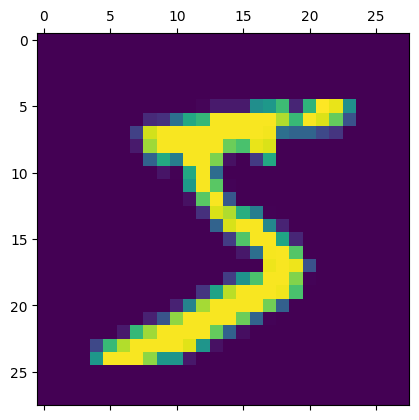

In [16]:
plt.matshow(X_train[0])

In [17]:
y_train[0]

5

In [18]:
X_train = X_train / 255
X_test = X_test / 255

In [19]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Defining our CNN model

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Running the learning

In [23]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 4ms/step - loss: 0.1419 - accuracy: 0.9566
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0474 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0326 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0247 - accuracy: 0.9923
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0185 - accuracy: 0.9940
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0144 - accuracy: 0.9950
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

# We can see that we get 98.9% precision

In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9896


[0.03918236121535301, 0.9896000027656555]

In [26]:
y_pred = cnn.predict(X_test)


313/313 [==============================] - 1s 2ms/step


# We can see that the predictions and the real results match

In [30]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [31]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

# Visualising the Results

In [46]:
def compare(i):
  plt.matshow(X_test[i])
  print(f"The real value is = {y_classes[i]}")
  print("\n\n The hand writing ⬇")

The real value is = 4


 The hand writing ⬇


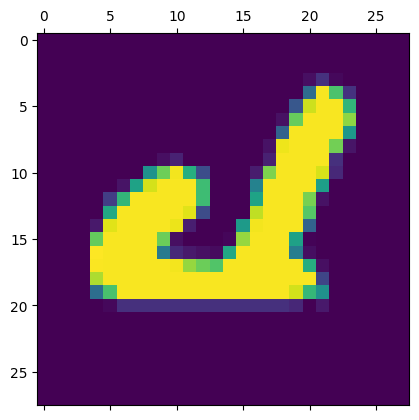

In [48]:
compare(8000)